# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm  # For auto ARIMA

In [3]:
# Load the CSV file
df = pd.read_csv("./Stock_Data/clean_stocks.csv") 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.dropna(inplace=True)  # Remove any initial NaNs
df

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-07,GOOG,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
2023-02-07,MSFT,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
2023-02-07,NFLX,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
2023-02-08,GOOG,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
...,...,...,...,...,...,...,...
2023-05-04,NFLX,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
2023-05-04,GOOG,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
2023-05-05,MSFT,305.720001,311.970001,304.269989,310.649994,310.649994,28181200


# Seasonal Decomposition

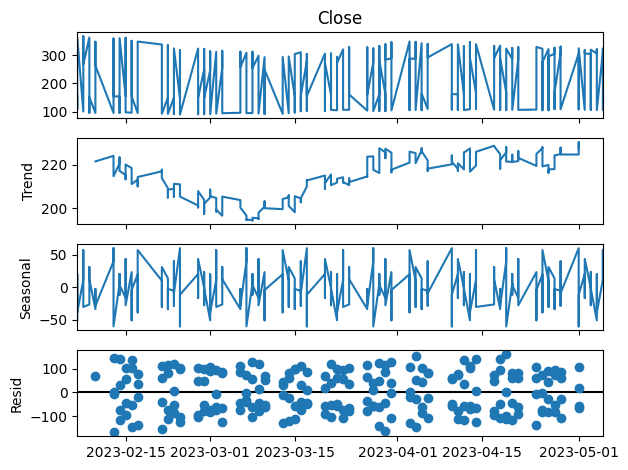

In [4]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)  # Adjust period as needed
decomposition.plot()
plt.show()

# Stationarity Test (ADF Test)

In [5]:
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

ADF Statistic: -11.508536
p-value: 0.000000
Critical Values:


In [6]:
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("Series is stationary")
else:
    print("Series is not stationary")

	1%: -3.458
	5%: -2.874
	10%: -2.573
Series is stationary


# ARIMA Modeling (Auto ARIMA)

In [7]:
model_auto_arima = pm.auto_arima(df['Close'], seasonal=False)  # You can set seasonal = True if there is seasonality.
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  247
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -1448.503
Date:                Wed, 09 Apr 2025   AIC                           2909.006
Time:                        11:25:38   BIC                           2930.062
Sample:                             0   HQIC                          2917.483
                                - 247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    416.9817     50.421      8.270      0.000     318.159     515.805
ar.L1         -0.2558      0.082     -3.138      0.002      -0.416      -0.096
ar.L2         -0.3245      0.083     -3.901      0.000      -0.488      -0.161
ar.L3         -0.1902      0.069     -2.755      0.006      -0.325      -0.055
ar.L4         -0.1622      0.069     -2.350      0.019      -0.298      -0.027
sigma2      7252.3921   1242.966      5.835      0.000    4816.224    9688.561
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.05
Prob(H) (two-sided):                  0.83   Kurtosis:                         1.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
model_arima = ARIMA(df['Close'], order=model_auto_arima.order)
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=30)

c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

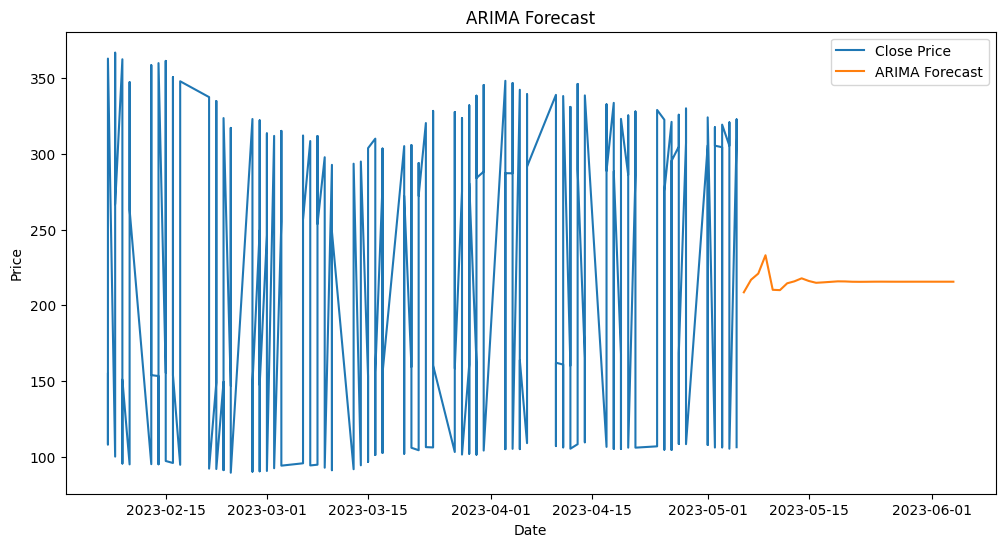

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()